In [63]:
#import libaries
import numpy as np
import pandas as pd

In [64]:
df=pd.read_csv('/content/covid_impact_on_airport_traffic.csv.zip')

In [65]:
df

,AggregationMethod,Date,Version,AirportName,PercentOfBaseline,Centroid,City,State,ISO_3166_2,Country,Geography
0,Daily,2020-04-03,1.0,Kingsford Smith,64,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
1,Daily,2020-04-13,1.0,Kingsford Smith,29,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
2,Daily,2020-07-10,1.0,Kingsford Smith,54,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
3,Daily,2020-09-02,1.0,Kingsford Smith,18,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
4,Daily,2020-10-31,1.0,Kingsford Smith,22,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
...,...,...,...,...,...,...,...,...,...,...,...
7242,Daily,2020-06-05,1.0,Seattle-Tacoma International,80,POINT(-122.308661576118 47.4505828917119),SeaTac,Washington,US-WA,United States of America (the),"POLYGON((-122.297594547272 47.434474106872, -1..."
7243,Daily,2020-10-03,1.0,Seattle-Tacoma International,55,POINT(-122.308661576118 47.4505828917119),SeaTac,Washington,US-WA,United States of America (the),"POLYGON((-122.297594547272 47.434474106872, -1..."
7244,Daily,2020-07-16,1.0,Seattle-Tacoma International,76,POINT(-122.308661576118 47.4505828917119),SeaTac,Washington,US-WA,United States of America (the),"POLYGON((-122.297594547272 47.434474106872, -1..."
7245,Daily,2020-07-31,1.0,Seattle-Tacoma International,69,POINT(-122.308661576118 47.4505828917119),SeaTac,Washington,US-WA,United States of America (the),"POLYGON((-122.297594547272 47.434474106872, -1..."


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7247 entries, 0 to 7246
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AggregationMethod  7247 non-null   object 
 1   Date               7247 non-null   object 
 2   Version            7247 non-null   float64
 3   AirportName        7247 non-null   object 
 4   PercentOfBaseline  7247 non-null   int64  
 5   Centroid           7247 non-null   object 
 6   City               7247 non-null   object 
 7   State              7247 non-null   object 
 8   ISO_3166_2         7247 non-null   object 
 9   Country            7247 non-null   object 
 10  Geography          7247 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 622.9+ KB


In [67]:
df.isna().sum()

AggregationMethod    0
Date                 0
Version              0
AirportName          0
PercentOfBaseline    0
Centroid             0
City                 0
State                0
ISO_3166_2           0
Country              0
Geography            0
dtype: int64

In [68]:
df.nunique()

AggregationMethod      1
Date                 262
Version                1
AirportName           28
PercentOfBaseline     99
Centroid              28
City                  27
State                 23
ISO_3166_2            23
Country                4
Geography             28
dtype: int64

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

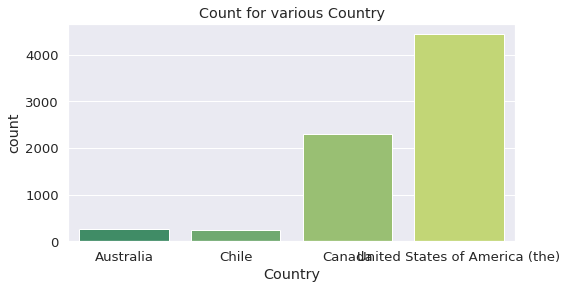

In [70]:
plt.figure(figsize=(8,4))
fig4 = sns.countplot(x = 'Country', data = df , palette='summer')
fig4.set_xticklabels(fig4.get_xticklabels())
fig4.set_title("Count for various Country")
plt.show();

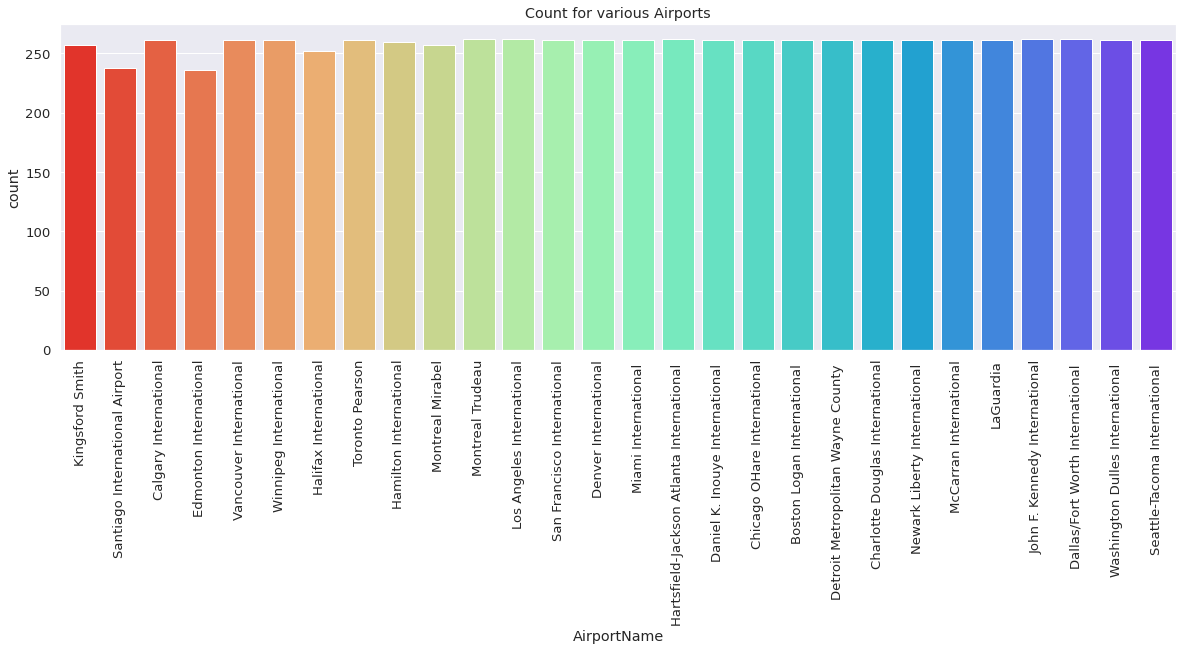

In [71]:
plt.figure(figsize=(20,6))
fig1 = sns.countplot(x = 'AirportName', data = df , palette='rainbow_r')
fig1.set_xticklabels(fig1.get_xticklabels(), rotation=90)
fig1.set_title("Count for various Airports")
plt.show();

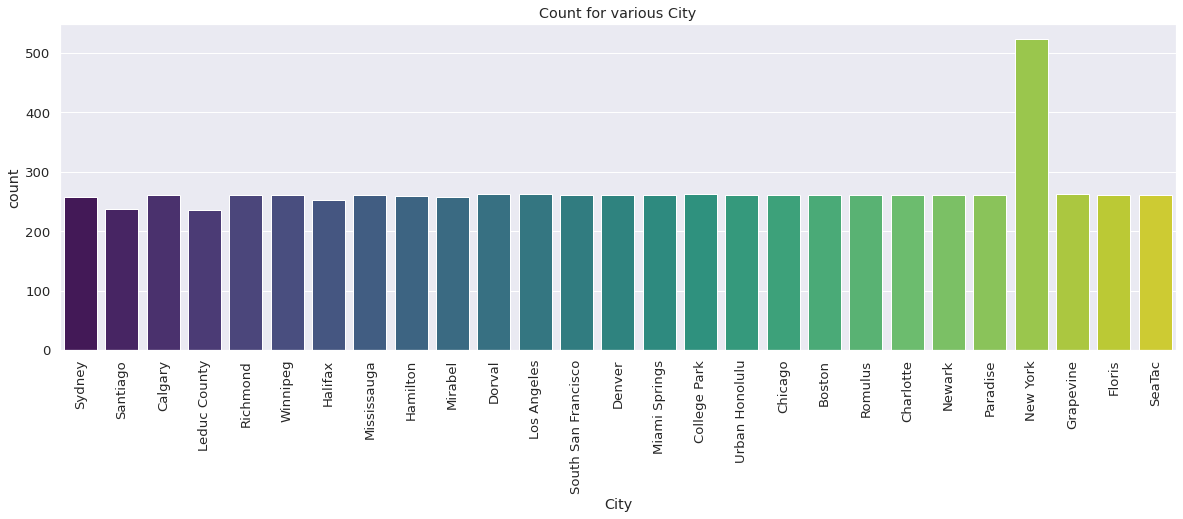

In [72]:
plt.figure(figsize=(20,6))
fig2 = sns.countplot(x = 'City', data = df , palette='viridis')
fig2.set_xticklabels(fig2.get_xticklabels(), rotation=90)
fig2.set_title("Count for various City")
plt.show();

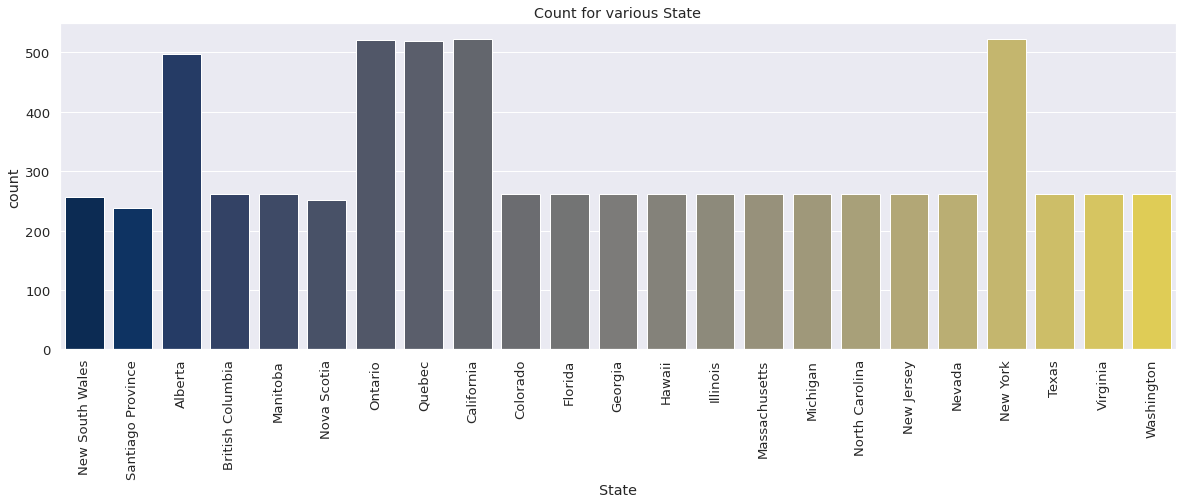

In [73]:
plt.figure(figsize=(20,6))
fig3 = sns.countplot(x = 'State', data = df , palette='cividis')
fig3.set_xticklabels(fig3.get_xticklabels(), rotation=90)
fig3.set_title("Count for various State")
plt.show();

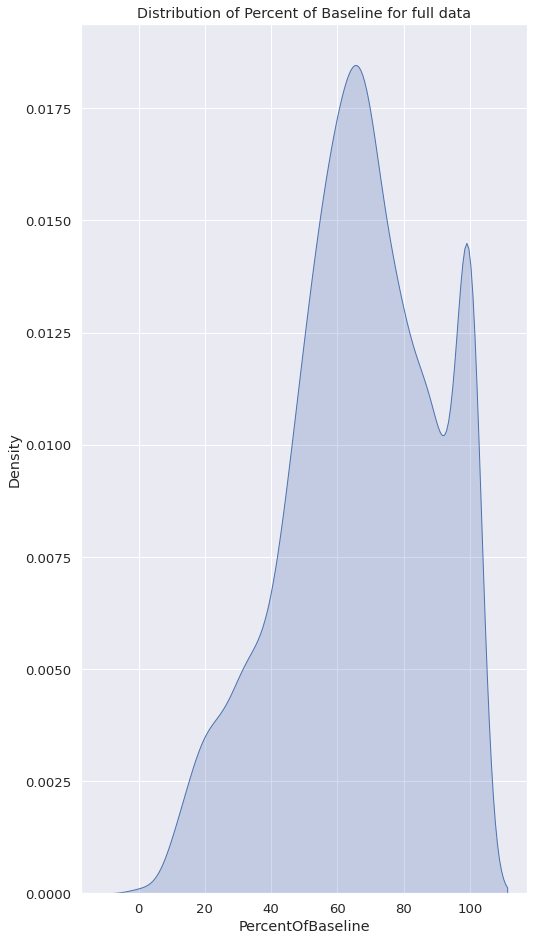

In [74]:
sns.kdeplot(df['PercentOfBaseline'],shade=True)
plt.title("Distribution of Percent of Baseline for full data")
plt.show();

In [75]:
percentofbaseline_mean_by_country = df.groupby('Country', as_index=False) \
                                        .agg({'PercentOfBaseline': 'mean'}) \
                                        .rename(columns={'PercentOfBaseline': 'PercentOfBaseline_mean'}) \
                                        .sort_values('PercentOfBaseline_mean', ascending=False)

percentofbaseline_mean_by_country 

,Country,PercentOfBaseline_mean
1,Canada,77.409347
3,United States of America (the),64.460932
0,Australia,37.750973
2,Chile,34.273109


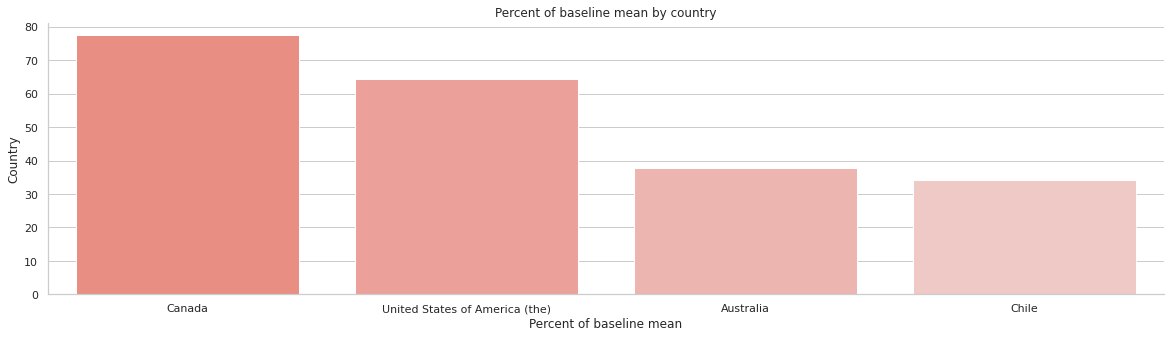

In [76]:
sns.set_theme(style="whitegrid", palette="light:salmon_r", rc={'figure.figsize': (20, 5)})
ax = sns.barplot(data=percentofbaseline_mean_by_country, x='Country', y='PercentOfBaseline_mean')
ax.set_title('Percent of baseline mean by country')
ax.set_xlabel('Percent of baseline mean')
ax.set_ylabel('Country')
sns.despine()

In [77]:
PercentOfBaseline_by_Date = df.groupby('Date', as_index=False) \
                                .agg({'PercentOfBaseline': 'mean'})

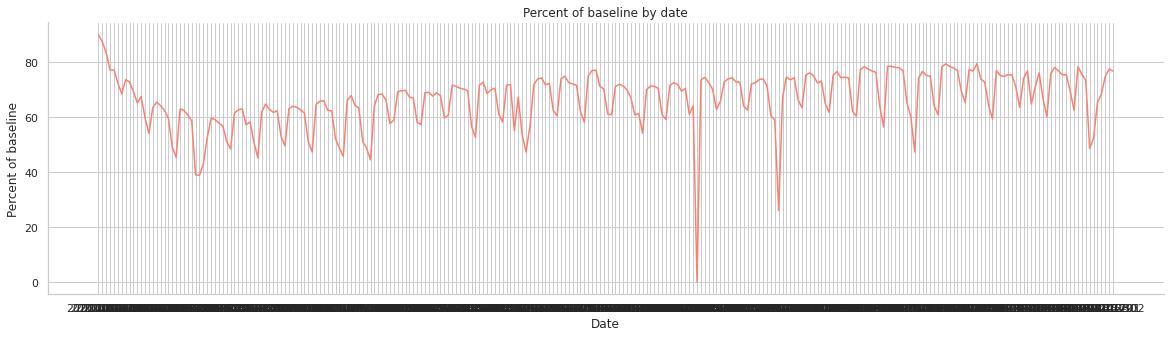

In [78]:
ax = sns.lineplot(x='Date', y='PercentOfBaseline', data=PercentOfBaseline_by_Date)
ax.set_ylabel('Percent of baseline')
ax.set_xlabel('Date')
ax.set_title('Percent of baseline by date')
sns.despine()

In [79]:
min_perpercentofbase = PercentOfBaseline_by_Date.PercentOfBaseline.min()

PercentOfBaseline_by_Date.query('PercentOfBaseline == @min_perpercentofbase')

,Date,PercentOfBaseline
154,2020-08-17,0.2


In [80]:
df.query("Date == '2020-08-17'")

,AggregationMethod,Date,Version,AirportName,PercentOfBaseline,Centroid,City,State,ISO_3166_2,Country,Geography
2670,Daily,2020-08-17,1.0,Montreal Trudeau,0,POINT(-73.7424121584688 45.4678436940192),Dorval,Quebec,CA-QC,Canada,"POLYGON((-73.751757144928 45.44954912446, -73...."
2845,Daily,2020-08-17,1.0,Los Angeles International,1,POINT(-118.404993180627 33.941369379328),Los Angeles,California,US-CA,United States of America (the),"POLYGON((-118.439612388611 33.9517616366508, -..."
3904,Daily,2020-08-17,1.0,Hartsfield-Jackson Atlanta International,0,POINT(-84.4279188822754 33.6410758198944),College Park,Georgia,US-GA,United States of America (the),"POLYGON((-84.4299745559692 33.657852680999, -8..."
6307,Daily,2020-08-17,1.0,John F. Kennedy International,0,POINT(-73.7784465295804 40.6460265940045),New York,New York,US-NY,United States of America (the),"POLYGON((-73.7883961200714 40.6226989508664, -..."
6469,Daily,2020-08-17,1.0,Dallas/Fort Worth International,0,POINT(-97.0394983968728 32.8940590356408),Grapevine,Texas,US-TX,United States of America (the),"POLYGON((-97.0429444313049 32.9265900261254, -..."


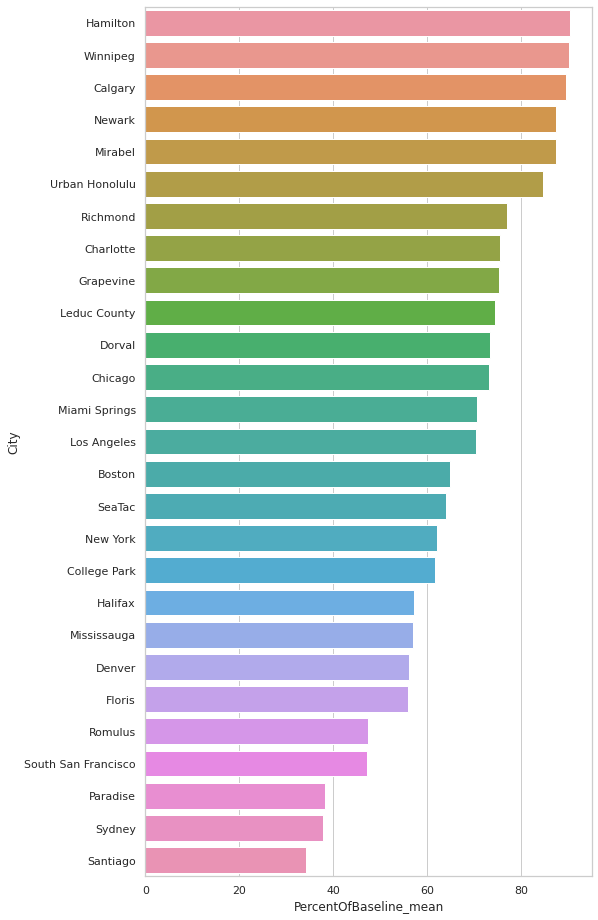

In [81]:
df_city = df.groupby('City', as_index=False) \
            .agg({'PercentOfBaseline': 'mean'}) \
            .rename(columns={'PercentOfBaseline': 'PercentOfBaseline_mean'}) \
            .sort_values('PercentOfBaseline_mean', ascending=False)

sns.set_theme(style="whitegrid", rc={'figure.figsize': (8, 16)})
ax = sns.barplot(data=df_city, x='PercentOfBaseline_mean', y='City')

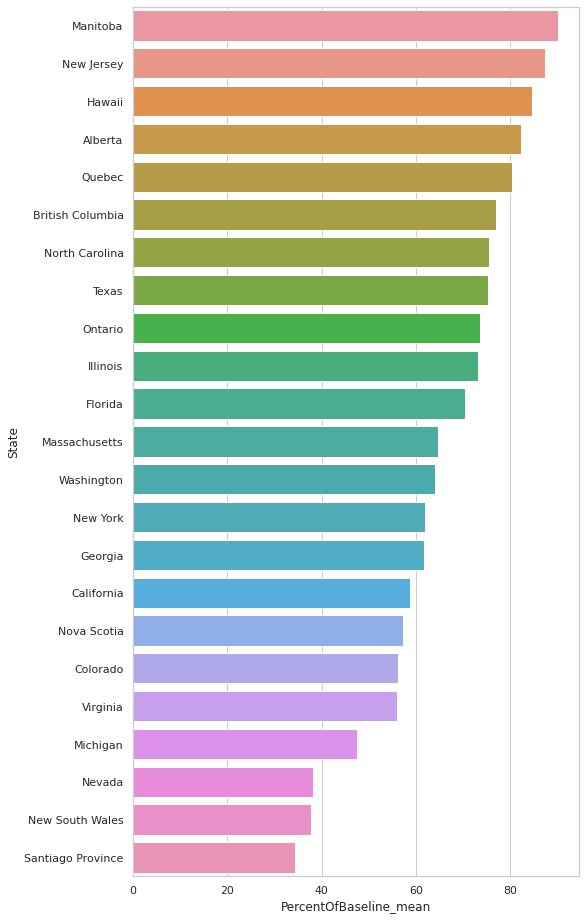

In [82]:
df_state = df.groupby('State', as_index=False) \
            .agg({'PercentOfBaseline': 'mean'}) \
            .rename(columns={'PercentOfBaseline': 'PercentOfBaseline_mean'}) \
            .sort_values('PercentOfBaseline_mean', ascending=False)

sns.set_theme(style="whitegrid", rc={'figure.figsize': (8, 16)})
ax = sns.barplot(data=df_state, x='PercentOfBaseline_mean', y='State')

Text(0, 0.5, 'Airport name')

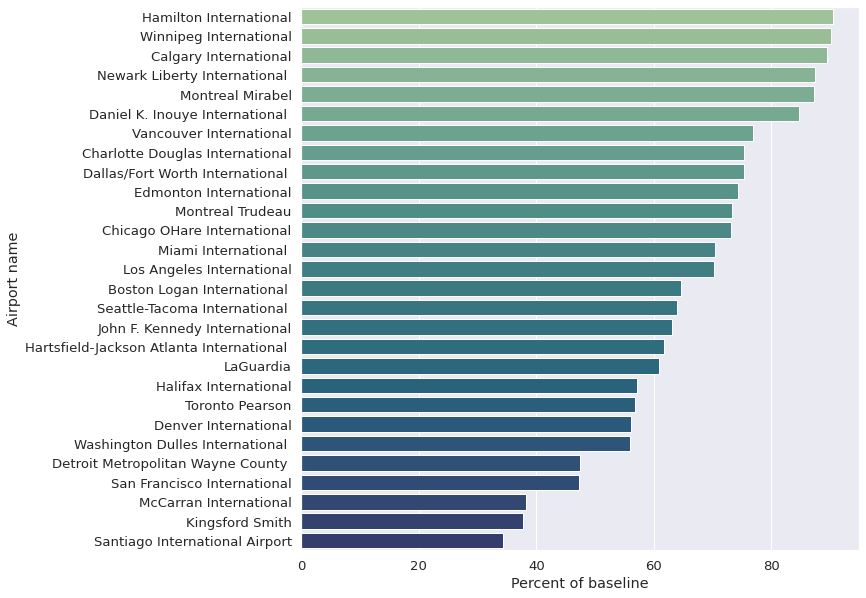

In [83]:
df1 = df.groupby("AirportName")['PercentOfBaseline'].mean().sort_values(ascending = False).reset_index()
sns.set(font_scale =1.2)
plt.figure(figsize = [10,10])
sns.barplot(data = df1, x = 'PercentOfBaseline', y = 'AirportName',palette = 'crest')
plt.xlabel('Percent of baseline')
plt.ylabel("Airport name")

In [84]:
df["lon"] = df.Centroid.apply(lambda x: x.split(" ")[0].replace("POINT("," "))
df["lat"] = df.Centroid.apply(lambda x: x.split(" ")[1].replace(")"," "))

In [85]:
df1 = df.groupby(["Country","City",'lat','lon'])['PercentOfBaseline'].mean().sort_values(ascending = False).reset_index()
fig = px.scatter_geo(df1,
                     lat='lat',
                     lon='lon',
                     hover_name="Country",
                     color = 'Country',
                     hover_data = ['PercentOfBaseline',"City"],
                     labels = {"PercentOfBaseline":"Percent of Baseline"}
                     
                    )
fig.update_geos(showocean = True,
                oceancolor = 'LightCyan',
                lakecolor = 'LightSteelBlue',
                showlakes = True,
               
               )
fig.show()

In [86]:
data = df.drop(columns = ['AggregationMethod','Version','Centroid','ISO_3166_2','Geography','lon','lat'])

In [87]:
data.head()

,Date,AirportName,PercentOfBaseline,City,State,Country
0,2020-04-03,Kingsford Smith,64,Sydney,New South Wales,Australia
1,2020-04-13,Kingsford Smith,29,Sydney,New South Wales,Australia
2,2020-07-10,Kingsford Smith,54,Sydney,New South Wales,Australia
3,2020-09-02,Kingsford Smith,18,Sydney,New South Wales,Australia
4,2020-10-31,Kingsford Smith,22,Sydney,New South Wales,Australia


No handles with labels found to put in legend.


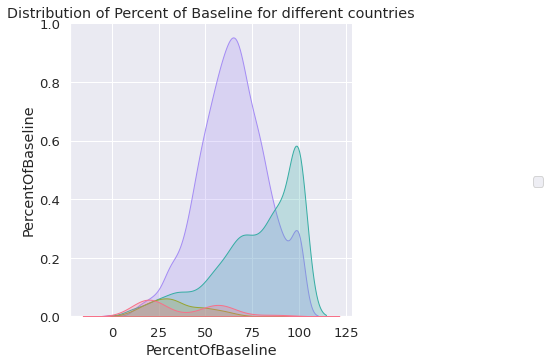

In [88]:
fig5 = sns.pairplot(data,hue='Country',height=5,palette='husl',aspect=1)
fig5._legend.remove()
plt.title("Distribution of Percent of Baseline for different countries")
plt.legend(loc = 'upper right',bbox_to_anchor=(1.2, 0., 0.5, 0.5))
plt.show();

In [89]:
#Analyse Australia

In [90]:
data_aus = data[data['Country']=='Australia']

In [91]:
data_aus

,Date,AirportName,PercentOfBaseline,City,State,Country
0,2020-04-03,Kingsford Smith,64,Sydney,New South Wales,Australia
1,2020-04-13,Kingsford Smith,29,Sydney,New South Wales,Australia
2,2020-07-10,Kingsford Smith,54,Sydney,New South Wales,Australia
3,2020-09-02,Kingsford Smith,18,Sydney,New South Wales,Australia
4,2020-10-31,Kingsford Smith,22,Sydney,New South Wales,Australia
...,...,...,...,...,...,...
252,2020-09-07,Kingsford Smith,11,Sydney,New South Wales,Australia
253,2020-04-16,Kingsford Smith,60,Sydney,New South Wales,Australia
254,2020-05-25,Kingsford Smith,53,Sydney,New South Wales,Australia
255,2020-06-04,Kingsford Smith,59,Sydney,New South Wales,Australia


In [92]:
data_aus.set_index('Date',inplace=True)

In [93]:
data_aus

,AirportName,PercentOfBaseline,City,State,Country
Date,,,,,
2020-04-03,Kingsford Smith,64,Sydney,New South Wales,Australia
2020-04-13,Kingsford Smith,29,Sydney,New South Wales,Australia
2020-07-10,Kingsford Smith,54,Sydney,New South Wales,Australia
2020-09-02,Kingsford Smith,18,Sydney,New South Wales,Australia
2020-10-31,Kingsford Smith,22,Sydney,New South Wales,Australia
...,...,...,...,...,...
2020-09-07,Kingsford Smith,11,Sydney,New South Wales,Australia
2020-04-16,Kingsford Smith,60,Sydney,New South Wales,Australia
2020-05-25,Kingsford Smith,53,Sydney,New South Wales,Australia


In [94]:
data_aus = data_aus.drop(columns=['AirportName','City','State','Country'])

In [95]:
data_aus.head()

,PercentOfBaseline
Date,
2020-04-03,64
2020-04-13,29
2020-07-10,54
2020-09-02,18
2020-10-31,22


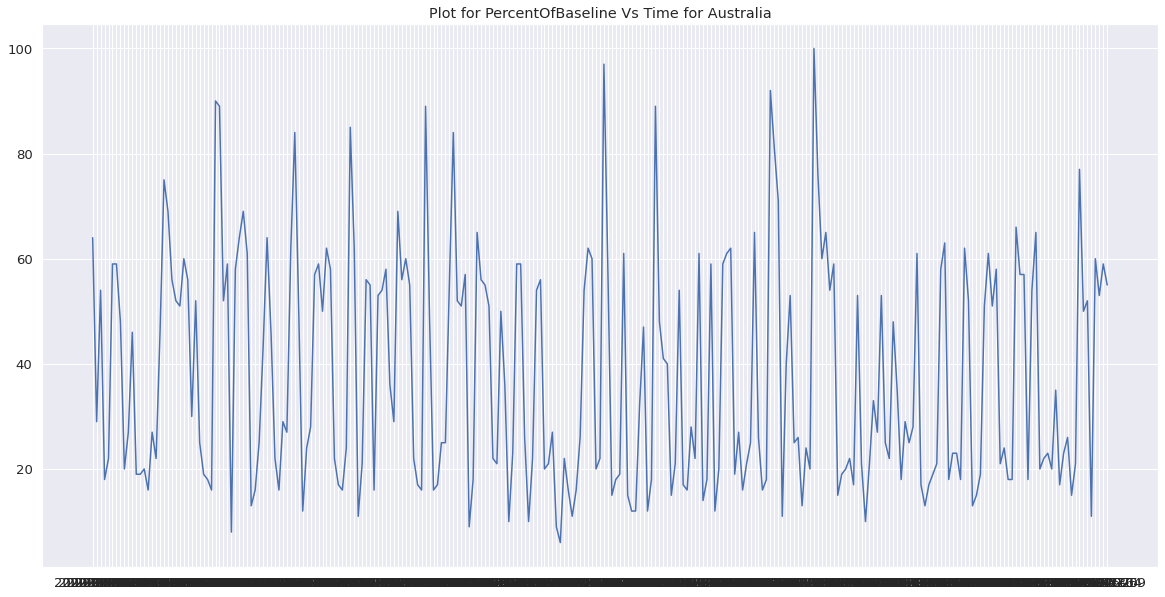

In [96]:
plt.figure(figsize=(20,10))
plt.plot(data_aus['PercentOfBaseline'])
plt.title("Plot for PercentOfBaseline Vs Time for Australia")
plt.show();

In [97]:
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
dftest = adfuller(data_aus['PercentOfBaseline'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                -1.183490e+01
p-value                        7.832680e-22
#Lags Used                     1.000000e+00
Number of Observations Used    2.550000e+02
Critical Value (1%)           -3.456257e+00
Critical Value (5%)           -2.872942e+00
Critical Value (10%)          -2.572846e+00
dtype: float64


In [98]:
from statsmodels.tsa.stattools import kpss
#define KPSS
print ('Results of KPSS Test:')
kpsstest = kpss(data_aus['PercentOfBaseline'], regression='c')
kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
for key,value in kpsstest[3].items():
    kpss_output['Critical Value (%s)'%key] = value
print (kpss_output)

Results of KPSS Test:
Test Statistic            0.367110
p-value                   0.091332
Lags Used                16.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning:

The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'



In [99]:
data_aus['diff'] = data_aus['PercentOfBaseline'] - data_aus['PercentOfBaseline'].shift(1)

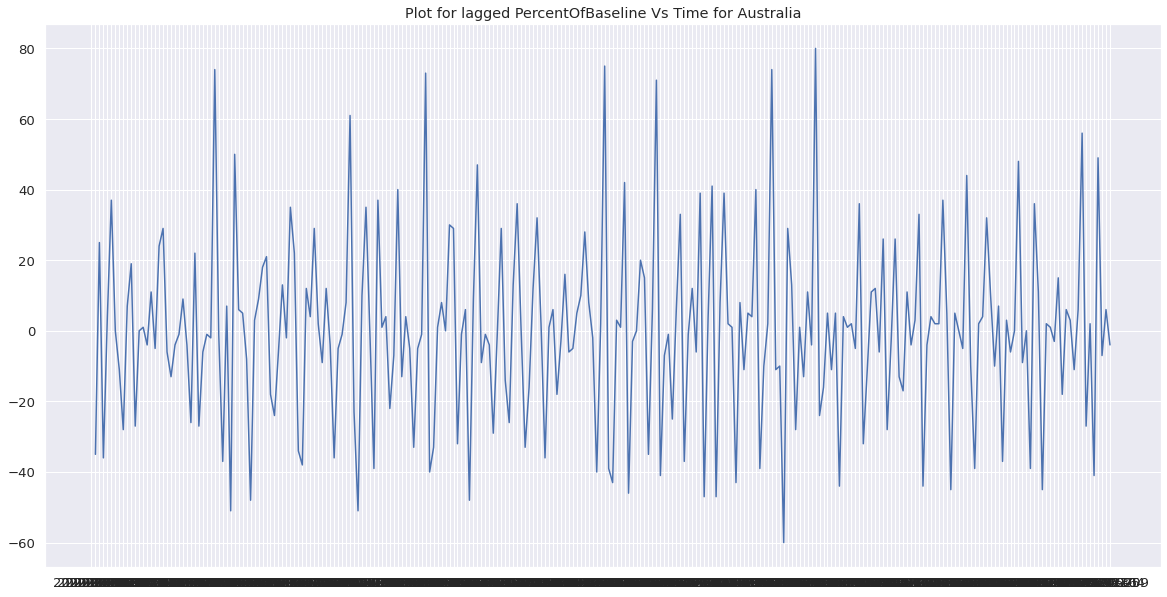

In [100]:
plt.figure(figsize=(20,10))
plt.plot(data_aus['diff'])
plt.title("Plot for lagged PercentOfBaseline Vs Time for Australia")
plt.show();

In [101]:
print('Results of Dickey-Fuller Test:')
dftest = adfuller(data_aus['diff'].dropna(), autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                -8.680833e+00
p-value                        4.290639e-14
#Lags Used                     1.300000e+01
Number of Observations Used    2.420000e+02
Critical Value (1%)           -3.457664e+00
Critical Value (5%)           -2.873559e+00
Critical Value (10%)          -2.573175e+00
dtype: float64


In [102]:
print ('Results of KPSS Test:')
kpsstest = kpss(data_aus['diff'].dropna(), regression='c')
kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
for key,value in kpsstest[3].items():
    kpss_output['Critical Value (%s)'%key] = value
print (kpss_output)

Results of KPSS Test:
Test Statistic            0.059448
p-value                   0.100000
Lags Used                16.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning:

The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1711: InterpolationWarning:

p-value is greater than the indicated p-value



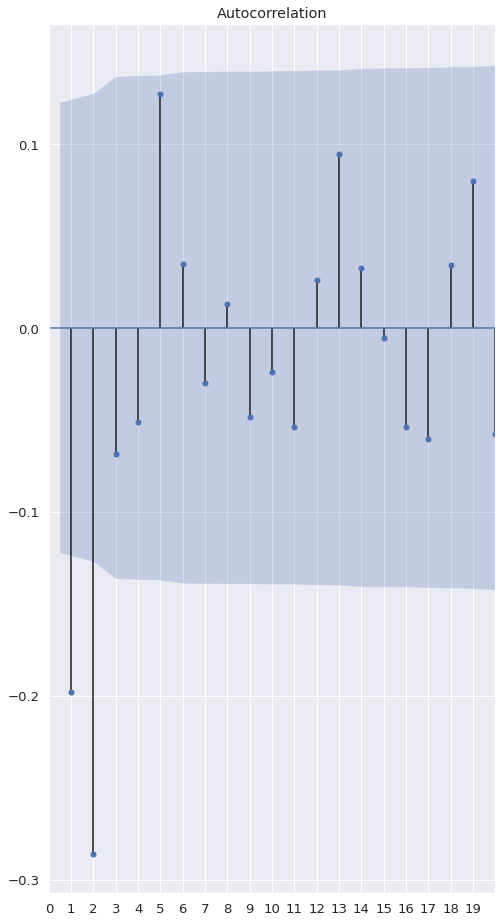

In [103]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(data_aus['diff'].dropna(),zero=False)
plt.xlim(0,20)
plt.xticks(np.arange(0,20,1))
plt.show();

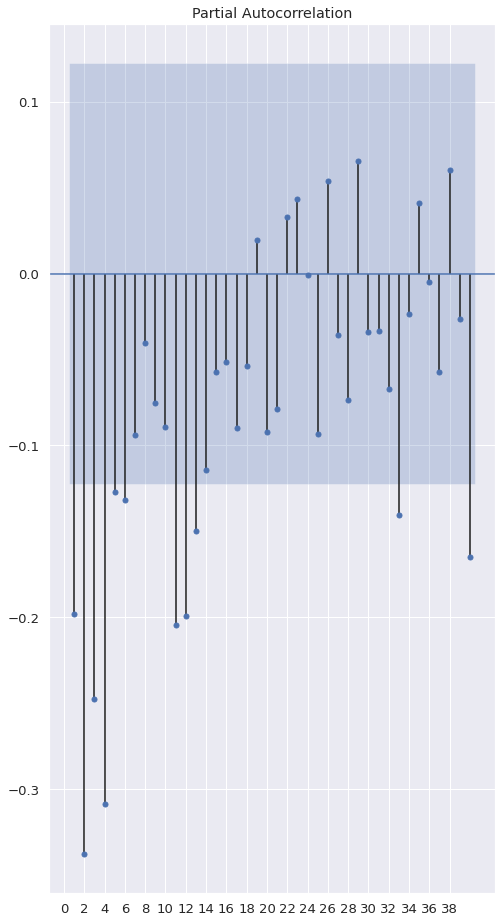

In [104]:
plot_pacf(data_aus['diff'].dropna(),zero=False,lags=40,method='ols',alpha=0.05)
plt.xticks(np.arange(0,40,2))
plt.show();

In [105]:
df1 = pd.DataFrame(data_aus['diff'])

In [106]:
df1.dropna(inplace=True)

In [107]:
from statsmodels.tsa.arima_model import ARMA

In [108]:
# Create Training and Test
train = df1.iloc[:212]
test = df1.iloc[212:]
# Build Model
model = ARMA(train, order=(6,0))  
fitted = model.fit()  
print(fitted.summary())

# Forecast
fc, se, conf = fitted.forecast(44, alpha=0.05); 

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



                              ARMA Model Results                              
Dep. Variable:                   diff   No. Observations:                  212
Model:                     ARMA(6, 0)   Log Likelihood                -954.216
Method:                       css-mle   S.D. of innovations             21.751
Date:                Fri, 01 Jul 2022   AIC                           1924.433
Time:                        07:29:10   BIC                           1951.286
Sample:                             0   HQIC                          1935.286
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1027      0.465     -0.221      0.825      -1.015       0.809
ar.L1.diff    -0.4571      0.068     -6.680      0.000      -0.591      -0.323
ar.L2.diff    -0.6275      0.075     -8.423      0.0

In [109]:
# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

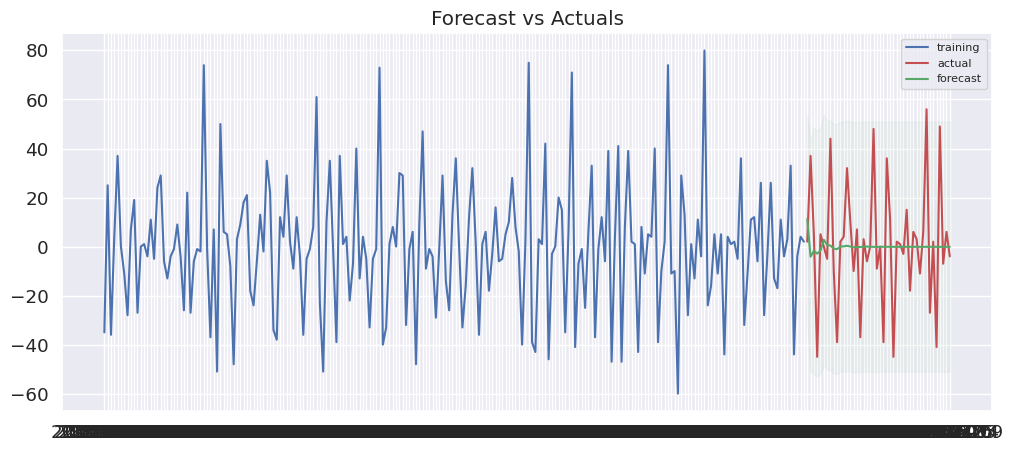

In [110]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual',color='r')
plt.plot(fc_series, label='forecast',color='g')
plt.fill_between(lower_series.index, lower_series, upper_series,color='g', alpha=.05)
plt.title('Forecast vs Actuals')
plt.legend(loc='best', fontsize=8)
plt.show()

In [111]:
#Analyse Canada

In [112]:
data_can = data[data['Country']=='Canada']

In [113]:
df2 = pd.DataFrame(data_can.groupby('Date',as_index=True)['PercentOfBaseline'].mean())

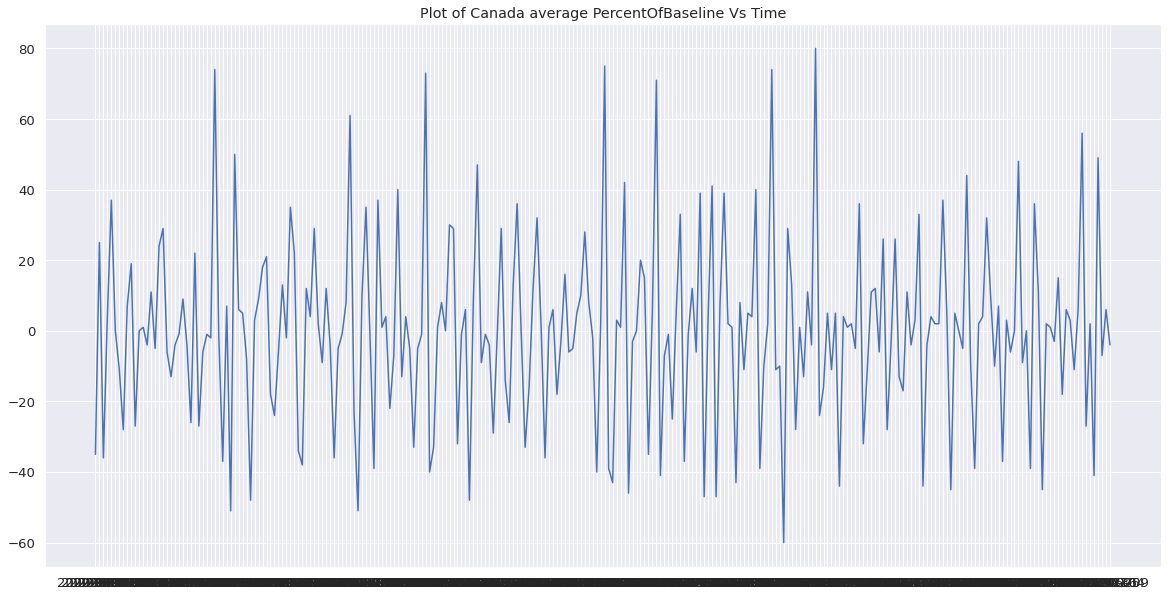

In [114]:
plt.figure(figsize=(20,10))
plt.plot(df1)
plt.title("Plot of Canada average PercentOfBaseline Vs Time")
plt.show()

In [115]:
print('Results of Dickey-Fuller Test:')
dftest = adfuller(df2['PercentOfBaseline'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  -1.724863
p-value                          0.418350
#Lags Used                      13.000000
Number of Observations Used    248.000000
Critical Value (1%)             -3.456996
Critical Value (5%)             -2.873266
Critical Value (10%)            -2.573019
dtype: float64


In [116]:
print ('Results of KPSS Test:')
kpsstest = kpss(df2['PercentOfBaseline'].dropna(), regression='c')
kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
for key,value in kpsstest[3].items():
    kpss_output['Critical Value (%s)'%key] = value
print (kpss_output)

Results of KPSS Test:
Test Statistic            0.896685
p-value                   0.010000
Lags Used                16.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning:

The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning:

p-value is smaller than the indicated p-value



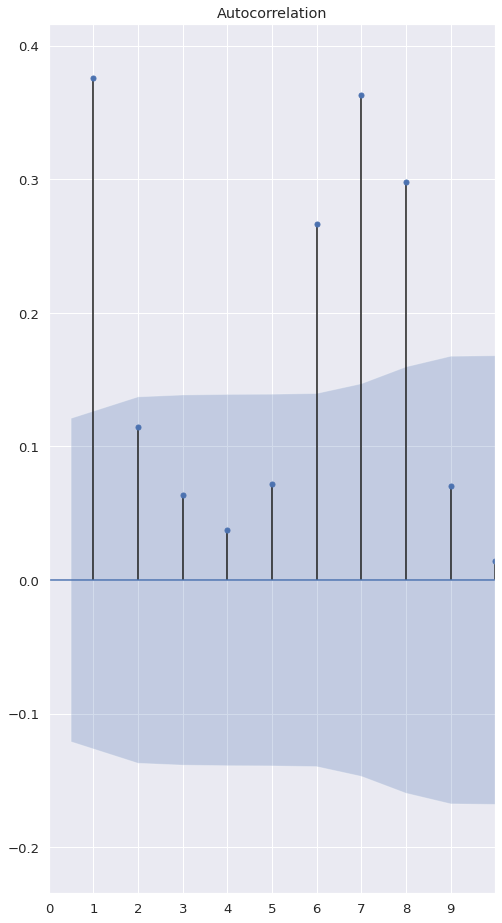

In [117]:
plot_acf(df2['PercentOfBaseline'],zero=False)
plt.xlim(0,10)
plt.xticks(np.arange(0,10,1))
plt.show()

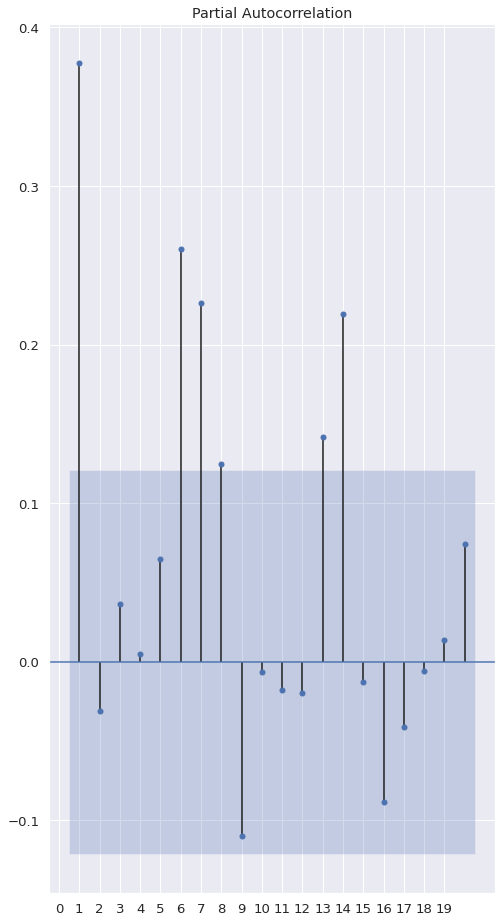

In [118]:
plot_pacf(df2['PercentOfBaseline'],lags=20,zero=False)
plt.xticks(np.arange(0,20,1))
plt.show()

In [119]:
# Create Training and Test
size = int(len(df2['PercentOfBaseline'])*0.8)
train1 = df2['PercentOfBaseline'].iloc[:size]
test1 = df2['PercentOfBaseline'].iloc[size:]
# Build Model
model1 = ARMA(train1, order=(1,2))  
fitted1 = model1.fit() 
print(fitted1.summary())

# Forecast
fc1, se1, conf1 = fitted.forecast(len(test1), alpha=0.05)  # 95% conf

# Make as pandas series
fc1_series = pd.Series(fc1, index=test1.index)
lower_series1 = pd.Series(conf1[:, 0], index=test1.index)
upper_series1 = pd.Series(conf1[:, 1], index=test1.index)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



                              ARMA Model Results                              
Dep. Variable:      PercentOfBaseline   No. Observations:                  209
Model:                     ARMA(1, 2)   Log Likelihood                -844.402
Method:                       css-mle   S.D. of innovations             13.742
Date:                Fri, 01 Jul 2022   AIC                           1698.804
Time:                        07:29:27   BIC                           1715.516
Sample:                    03-16-2020   HQIC                          1705.561
                         - 10-10-2020                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      75.8541      2.944     25.763      0.000      70.083      81.625
ar.L1.PercentOfBaseline     0.9632      0.034     28.355      0.000       0.897       1.030


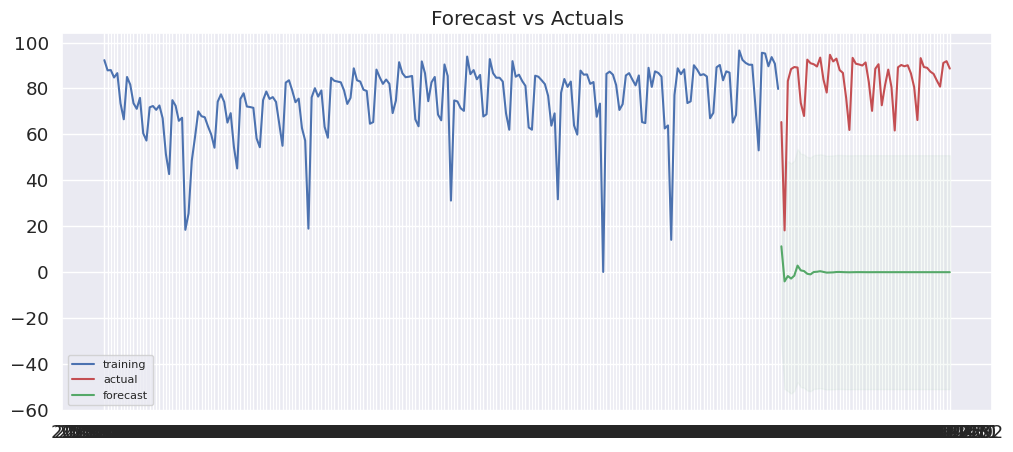

In [120]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train1, label='training')
plt.plot(test1, label='actual',color='r')
plt.plot(fc1_series, label='forecast',color='g')
plt.fill_between(lower_series1.index, lower_series1, upper_series1,color='g', alpha=.05)
plt.title('Forecast vs Actuals')
plt.legend(loc='best', fontsize=8)
plt.show()